In [92]:
import pandas as pd
import os
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
%cd /content/drive/My Drive/SERIE HISTORICA INVERSIONES MOP 2010-2021/

/content/drive/My Drive/SERIE HISTORICA INVERSIONES MOP 2010-2021


In [94]:
%matplotlib inline
import pandas as pd
import numpy as np

In [95]:
df_inversiones = pd.read_csv('notebooks/data/clean_inversiones.csv')

In [96]:
df_inversiones

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,COMUNA
0,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,1.090802e+04,EDIFICIOS MOP,ARICA
1,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,3.948023e+05,EDIFICIOS MOP,ARICA
2,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,1.253289e+04,EDIFICIOS MOP,LA SERENA
3,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.032167e+06,EDIFICIOS MOP,LA SERENA
4,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.430104e+05,EDIFICIOS MOP,LA SERENA
...,...,...,...,...,...,...,...
26958,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION INVENTARIO D° DE AGUA AFECTO PAGO...,4.653396e+04,GESTION Y FISCALIZACION,INTERCOMUNAL
26959,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION INVENTARIO D° DE AGUA AFECTO PAGO...,5.505016e+04,GESTION Y FISCALIZACION,INTERCOMUNAL
26960,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION CONSERVACIÓN ESTACIONES FLUVIOMÉT...,1.000000e+05,MANTENCION Y OPERACIÓN DE LA RED DE CALIDAD DE...,INTERCOMUNAL
26961,2021,Dirección General de Aguas - FET-COVID-19,No Regionalizable,CONSERVACION CONSERVACIÓN ESTACIONES FLUVIOMÉT...,2.071410e+06,MANTENCION Y OPERACIÓN DE LA RED DE CALIDAD DE...,INTERCOMUNAL


## Visión general del dataset

In [68]:
df_inversiones.columns

Index(['AÑO', 'SERVICIO', 'REGIÓN', 'NOMBRE',
       'INVERSIÓN (MILES DE $ AÑO 2021)', 'PROGRAMA', 'COMUNA'],
      dtype='object')

In [69]:
df_inversiones.dtypes

AÑO                                  int64
SERVICIO                            object
REGIÓN                              object
NOMBRE                              object
INVERSIÓN (MILES DE $ AÑO 2021)    float64
PROGRAMA                            object
COMUNA                              object
dtype: object

In [70]:
df_inversiones.describe()

,AÑO,INVERSIÓN (MILES DE $ AÑO 2021)
count,26963.000000,2.696300e+04
mean,2016.114268,7.916208e+05
std,3.454382,2.576732e+06
min,2010.000000,5.000000e-02
25%,2013.000000,6.584574e+03
50%,2016.000000,9.595757e+04
75%,2019.000000,4.305891e+05
max,2021.000000,6.868238e+07


## Análisis unidimensional de las variables

In [71]:
df_inversiones['REGIÓN'].value_counts()

Los Lagos                 2831
Bio Bio                   2317
Metropolitana             2285
Los Ríos                  2078
Araucanía                 2053
Valparaíso                2026
No Regionalizable         1872
Libertador B O Higgins    1668
Maule                     1647
Coquimbo                  1549
Aysén                     1224
Magallanes y Ach          1100
Arica y Parinacota        1024
Antofagasta               1024
Atacama                    980
Tarapacá                   933
Ñuble                      352
Name: REGIÓN, dtype: int64

In [72]:
len(df_inversiones['PROGRAMA'].unique())

92

In [73]:
df_inversiones['SERVICIO'].value_counts()[0:10]

Dirección de Vialidad                  12986
Agua Potable Rural                      3466
Dirección de Obras Hidráulicas          2620
Dirección de Obras Portuarias           2036
Administración Sistema Concesiones      1486
Dirección de Aeropuertos                1354
Dirección General de Concesiones         863
Dirección de Arquitectura                661
Dirección General de Aguas               581
Dirección de Vialidad - FET - Covid      264
Name: SERVICIO, dtype: int64

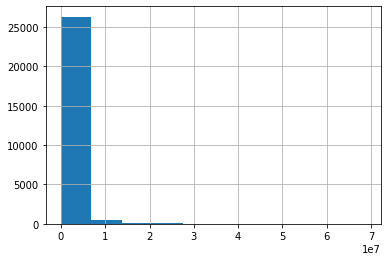

In [74]:
df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'].hist()

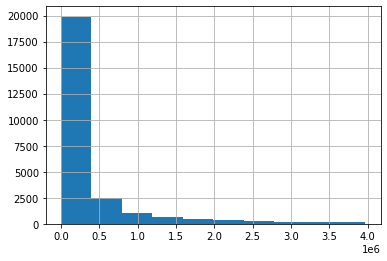

In [75]:
df_inversiones[df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'] < df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'].quantile(0.95)]['INVERSIÓN (MILES DE $ AÑO 2021)'].hist()

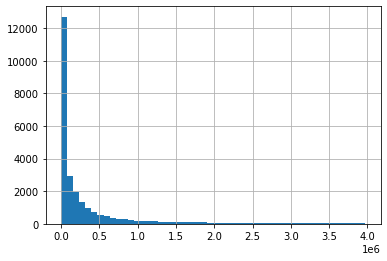

In [76]:
df_inversiones[df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'] < df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'].quantile(0.95)]['INVERSIÓN (MILES DE $ AÑO 2021)'].hist(bins=50)

In [77]:
df_inversiones[df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'] < df_inversiones['INVERSIÓN (MILES DE $ AÑO 2021)'].quantile(0.95)].head(5)

,AÑO,SERVICIO,REGIÓN,NOMBRE,INVERSIÓN (MILES DE $ AÑO 2021),PROGRAMA,COMUNA
0,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,1.090802e+04,EDIFICIOS MOP,ARICA
1,2010,Dirección de Arquitectura,Arica y Parinacota,AMPLIACION OFICINAS MOP EDIFICIO SERVICIOS PUB...,3.948023e+05,EDIFICIOS MOP,ARICA
2,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,1.253289e+04,EDIFICIOS MOP,LA SERENA
3,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.032167e+06,EDIFICIOS MOP,LA SERENA
4,2010,Dirección de Arquitectura,Coquimbo,CONSTRUCCION EDIFICIO M.O.P. LA SERENA,3.430104e+05,EDIFICIOS MOP,LA SERENA


## Análisis multidimensional de las variables

In [78]:
sum_inversion_programa = df_inversiones.groupby('PROGRAMA').sum()['INVERSIÓN (MILES DE $ AÑO 2021)']

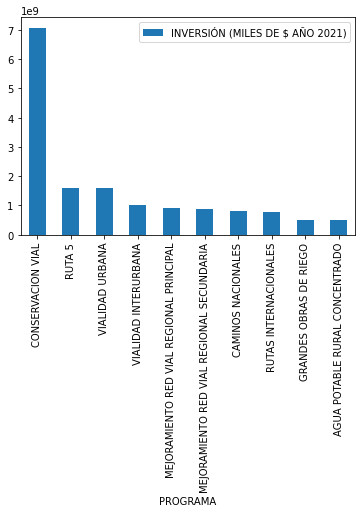

In [79]:
sum_inversion_programa.reset_index().sort_values(by='INVERSIÓN (MILES DE $ AÑO 2021)', ascending=False).iloc[0:10].plot(kind='bar', x='PROGRAMA', y='INVERSIÓN (MILES DE $ AÑO 2021)')

In [80]:
sum_inversion_fecha = df_inversiones.groupby('AÑO').sum()['INVERSIÓN (MILES DE $ AÑO 2021)']

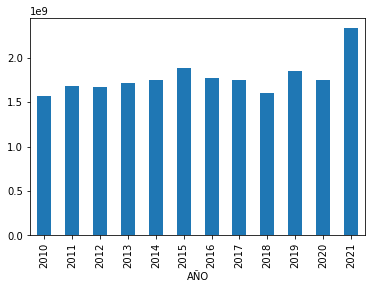

In [81]:
sum_inversion_fecha.plot(kind='bar', x='INVERSIÓN (MILES DE $ AÑO 2021)', y='AÑO')

In [82]:
df_inversiones_region = df_inversiones.groupby(['REGIÓN', 'SERVICIO']).sum()['INVERSIÓN (MILES DE $ AÑO 2021)'].sort_values().unstack('SERVICIO')

In [83]:
top_regiones = df_inversiones.groupby('REGIÓN')['INVERSIÓN (MILES DE $ AÑO 2021)'].sum().sort_values(ascending=False).index[0:5]

In [84]:
top_servicios = df_inversiones.groupby('SERVICIO')['INVERSIÓN (MILES DE $ AÑO 2021)'].sum().sort_values(ascending=False).index[0:5]

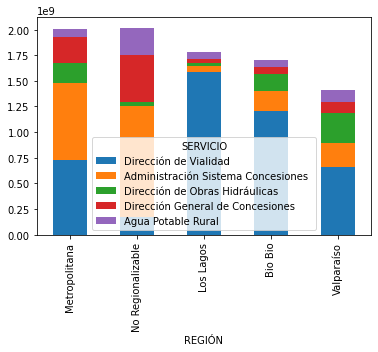

In [85]:
df_inversiones_region[top_servicios].loc[top_regiones].plot.bar(stacked=True)

## Análisis de texto

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
textos_inversiones = ''
for row in df_inversiones['NOMBRE']:
  textos_inversiones = textos_inversiones + ' ' + row

In [88]:
stopwords_list = stopwords.words('spanish') + ['MOP', 'M.O.P.', 'AÑO']

In [89]:
textos_inversiones = ' '.join([x for x in textos_inversiones.strip().lower().split(' ') if x not in stopwords_list and len(x) > 4])

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

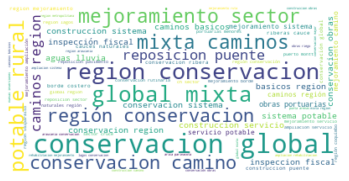

In [91]:
wc = WordCloud(background_color='white')
wc.generate(textos_inversiones)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()